<h1> Winner Tennis Prediction </h1>

## Read Data

WTA and ATP fata from github repository by <a href= 'https://github.com/JeffSackmann' >Jeff Sackmann</a>. 

There is a dictionary <a href='./dict.html'> dict.html </a>  made to understand the values and columns of the matches data. 

```console
!git clone https://github.com/JeffSackmann/tennis_wta.git
!git clone https://github.com/JeffSackmann/tennis_atp.git
```

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import os 
import re

In [2]:
atp_matches = []
for f in os.listdir('tennis_atp'):
    exp_re = r'atp_matches_\w+\.csv'
    if re.match(exp_re, f): 
        atp_matches.append(pd.read_csv('tennis_atp/' + f, encoding='latin-1')) 

match_men = pd.concat(atp_matches, ignore_index=True)

wta_matches = []
for f in os.listdir('tennis_wta'):
    exp_re = r'wta_matches_\w+\.csv'
    if re.match(exp_re, f) : 
        wta_matches.append(pd.read_csv('tennis_wta/' + f, encoding='latin-1'))

match_women = pd.concat(wta_matches,  ignore_index=True)

C:\Users\Ferrer\AppData\Local\Temp\ipykernel_9908\36385999.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  atp_matches.append(pd.read_csv('tennis_atp/' + f, encoding='latin-1'))
C:\Users\Ferrer\AppData\Local\Temp\ipykernel_9908\36385999.py:13: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  wta_matches.append(pd.read_csv('tennis_wta/' + f, encoding='latin-1'))
C:\Users\Ferrer\AppData\Local\Temp\ipykernel_9908\36385999.py:13: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  wta_matches.append(pd.read_csv('tennis_wta/' + f, encoding='latin-1'))
C:\Users\Ferrer\AppData\Local\Temp\ipykernel_9908\36385999.py:13: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  wta_matches.append(pd.read_csv('tennis_wta/' + f, encoding='latin-1'))


In [3]:
match_men['tourney_date'] = pd.to_datetime(match_men['tourney_date'].sort_values().astype('str'))
match_women['tourney_date'] = pd.to_datetime(match_women['tourney_date'].sort_values().astype('str'))

match_men = match_men[match_men['tourney_date'] >= '2000'].sort_values(by='tourney_date')
match_women = match_women[match_women['tourney_date'] >= '2000'].sort_values(by='tourney_date')

In [4]:
## FIX FOR DTYPE ERROR VALUE ON COLUMN 3
print(match_men.columns[3])
match_men.draw_size.unique()

for idx, d in enumerate(match_men['draw_size']):
    try: float(d)
    except ValueError: match_men.loc[idx, 'draw_size'] = np.NaN
    
match_men['draw_size'] = match_men.draw_size.astype(np.float32)

draw_size


In [5]:
## FIX FOR DTYPE ERROR ON COLUMNS 8, 16
for idx, seed, entry in zip(match_women.index, match_women['winner_seed'], match_women['winner_seed']):
    try: float(seed)
    except ValueError: 
        match_women.loc[idx, 'winner_seed'] = np.NaN
        match_women.loc[idx, 'winner_entry'] = seed
    
match_women['winner_seed'] = match_women.draw_size.astype(np.float32)

for idx, seed, entry in zip(match_women.index, match_women['loser_seed'], match_women['loser_seed']):
    try: float(seed)
    except ValueError: 
        match_women.loc[idx, 'loser_seed'] = np.NaN
        match_women.loc[idx, 'loser_entry'] = seed
    
match_women['loser_seed'] = match_women.draw_size.astype(np.float32)


In [6]:
players_men = pd.read_csv('tennis_atp/atp_players.csv').drop_duplicates(subset='player_id')
players_women = pd.read_csv('tennis_wta/wta_players.csv').drop_duplicates(subset='player_id')

C:\Users\Ferrer\AppData\Local\Temp\ipykernel_9908\2248765508.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  players_women = pd.read_csv('tennis_wta/wta_players.csv').drop_duplicates(subset='player_id')


In [7]:
## Keep only the players that are in the matches 
players_women = players_women[(players_women.player_id.isin(match_women.loser_id) | players_women.player_id.isin(match_women.loser_id))]
players_men = players_men[(players_men.player_id.isin(match_men.loser_id) | players_men.player_id.isin(match_men.loser_id))]

In [8]:
players = pd.concat([players_men, players_women], ignore_index=True).drop(columns='wikidata_id')
players.player_id.duplicated().sum() #there are ids duplicated

2109

There are 2109 players that have duplicated id  in between men and man!
Lets create new ids and ignore the existing ones, with a new attribute to indicate wether they are men or women. 

In [9]:
players['new_id'] = players.index
players['gender'] = ['M']*len(players_men) + ['W']*len(players_women)
players

,player_id,name_first,name_last,hand,dob,ioc,height,new_id,gender
0,100428,Gene,Mayer,R,19560411.0,USA,183.0,0,M
1,100644,Alexander,Zverev,R,19970420.0,GER,198.0,1,M
2,100754,Rafael,Avalos Brenes,R,19610621.0,CRC,NaN,2,M
3,100886,Gregg,Hill,R,19630104.0,USA,NaN,3,M
4,100943,Girts,Dzelde,R,19630716.0,LAT,173.0,4,M
...,...,...,...,...,...,...,...,...,...
28186,266635,Vaary,Shah,U,NaN,IND,NaN,28186,W
28187,266636,Danica,Fernando,U,NaN,IND,NaN,28187,W
28188,266637,Gia Alana,Pereira,U,NaN,IND,NaN,28188,W
28189,266638,Kyra,Shetty,U,NaN,IND,NaN,28189,W


In [10]:
players.isna().sum(axis=0).sort_values(ascending=False)

height        25576
dob            3807
hand             13
ioc               9
player_id         0
name_first        0
name_last         0
new_id            0
gender            0
dtype: int64

In [11]:
## FILL & STANDARD COUNTRY CODE 

## Wrong labeled acronymns 

abb = {
    'RSA': 'ZAF', 'SUI': 'CHE', 'GER': 'DEU', 'ZIM': 'ZWE', 'CRO': 'HRV', 'NED': 'NLD', 'MON': 'MCO', 'BAH': 'BHS', 'GRE': 'GRC',
       'POR': 'PRT', 'CHI': 'CHL', 'PAR': 'PRY', 'GUA': 'GTM', 'CRC': 'CRI', 'TPE': 'CHN', 'MAS': 'MYS', 'IRI': 'IRN', 'INA': 'IDN',
       'LIB': 'LBN', 'PHI': 'PHL', 'URU': 'URY', 'DEN': 'DNK', 'SLO': 'SVN', 'BUL': 'BGR', 'LAT': 'LVA', 'KUW': 'KWT', 'AHO': 'ANT',
       'ALG': 'DZA', 'HAI': 'HTI', 'PUR': 'PRI', 'SOL': 'SLB', 'SAM': 'WSM', 'ESA': 'SLV', 'OMA': 'OMN', 'SRI': 'LKA', 'BAR': 'BRB',
       'MAD': 'MDG', 'VIE': 'VNM', 'UNK': None, 'SCG': 'MNE', 'ANG': 'AGO', 'LES': 'LSO', 'BOT': 'BWA', 'MRI': 'MUS', 'POC': 'ASM',
       'FIJ': 'FJI', 'BER': 'BMU', 'HON': 'HND', 'MGL': 'MNG', 'TRI': 'TTO', 'NGR': 'NGA', 'VAN': 'VUT', 'ECA' : 'VCT'

}

ioc_data = pd.read_csv("countries_codes_and_coordinates.csv")
ioc_data['Alpha-2 code'] = ioc_data['Alpha-2 code'].str.replace(r"[^\w]", "", regex=True)
ioc_data['Alpha-3 code'] = ioc_data['Alpha-3 code'].str.replace(r"[^\w]", "", regex=True)

players['ioc'] = players.ioc.map(lambda x : abb.get(x, x)) 

In [13]:
## FILL MISSING DATE OF BIRTH WITH MEAN
aaa . 
## assign by gender+ioc
mean_dobs = players.groupby(by=['gender', 'ioc'])['dob'].transform('mean')
players['dob'] = players['dob'].fillna(mean_dobs)

## assign by gender
mean_dobs = players.groupby(by=['gender'])['dob'].transform('mean')
players['dob'] = players['dob'].fillna(mean_dobs)


players['dob'] = pd.to_datetime(players.dob)

In [14]:
## FILL MISSING HEIGHT WITH MEAN

## assign by gender+dob+ioc
mean_heights = players.groupby(by=['gender', 'dob', 'ioc'])['height'].transform('mean')
players['height'] = players['height'].fillna(mean_heights)

## assign by gender+dob
mean_heights = players.groupby(by=['gender', 'dob'])['height'].transform('mean')
players['height'] = players['height'].fillna(mean_heights)

## assign by gender
mean_heights = players.groupby(by=['gender'])['height'].transform('mean')
players['height'] = players['height'].fillna(mean_heights)

In [15]:
## FILL MISSING HAND WITH MEAN

## assign by gender
most_frequent_hand = players['hand'].mode().iloc[0] 
print(players.hand.unique(), most_frequent_hand)

players['hand'] = players['hand'].fillna(most_frequent_hand)

['R' 'L' 'A' 'U' nan] U


In [16]:
## NEW ID FOR MEN

# reset the index for the matched 
map_men = dict({int(k):id for k, id in zip(players.loc[players['gender']=='M', 'player_id'],
                                     players.loc[players['gender']=='M', 'new_id'])})
match_men['winner_id'] = match_men.winner_id.map(map_men)
match_men['loser_id'] = match_men.loser_id.map(map_men)

In [17]:
## NEW ID FOR WOMEN

map_women = dict({int(k):id for k, id in zip(players.loc[players['gender']=='W', 'player_id'],
                                     players.loc[players['gender']=='W', 'new_id'])})
match_women['winner_id'] = match_women.winner_id.map(map_women)
match_women['loser_id'] = match_women.loser_id.map(map_women)

In [18]:
## Final Dataset for both TMA & WTA
matches = pd.concat([match_men, match_women], ignore_index=True)
matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-339,Adelaide,Hard,32.0,A,2000-01-03,19,454.0,3.0,NaN,...,40.0,28.0,9.0,11.0,1.0,4.0,15.0,1748.0,78.0,572.0
1,2000-339,Adelaide,Hard,32.0,A,2000-01-03,13,431.0,8.0,NaN,...,53.0,37.0,27.0,16.0,3.0,7.0,37.0,995.0,654.0,24.0
2,2000-339,Adelaide,Hard,32.0,A,2000-01-03,14,67.0,NaN,NaN,...,35.0,23.0,8.0,9.0,3.0,7.0,63.0,763.0,77.0,581.0
3,2000-339,Adelaide,Hard,32.0,A,2000-01-03,15,837.0,NaN,NaN,...,67.0,57.0,22.0,17.0,3.0,6.0,138.0,336.0,351.0,103.0
4,2000-339,Adelaide,Hard,32.0,A,2000-01-03,16,292.0,2.0,NaN,...,55.0,40.0,12.0,11.0,8.0,10.0,12.0,1920.0,216.0,188.0


In [19]:
## Update de matches ioc with players ioc 

matches['winner_ioc'] = matches.winner_ioc.map(lambda x : abb.get(x, x)) 
matches['loser_ioc'] = matches.loser_ioc.map(lambda x : abb.get(x, x)) 

matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-339,Adelaide,Hard,32.0,A,2000-01-03,19,454.0,3.0,NaN,...,40.0,28.0,9.0,11.0,1.0,4.0,15.0,1748.0,78.0,572.0
1,2000-339,Adelaide,Hard,32.0,A,2000-01-03,13,431.0,8.0,NaN,...,53.0,37.0,27.0,16.0,3.0,7.0,37.0,995.0,654.0,24.0
2,2000-339,Adelaide,Hard,32.0,A,2000-01-03,14,67.0,NaN,NaN,...,35.0,23.0,8.0,9.0,3.0,7.0,63.0,763.0,77.0,581.0
3,2000-339,Adelaide,Hard,32.0,A,2000-01-03,15,837.0,NaN,NaN,...,67.0,57.0,22.0,17.0,3.0,6.0,138.0,336.0,351.0,103.0
4,2000-339,Adelaide,Hard,32.0,A,2000-01-03,16,292.0,2.0,NaN,...,55.0,40.0,12.0,11.0,8.0,10.0,12.0,1920.0,216.0,188.0


## Feature & Samples definition

### Pre-game dataset

In [20]:
## Remove Arbitrary info 
df = matches.drop(columns=['match_num', 'tourney_id'])

## Remove in-game stats 
df = df.drop(list(df.filter(regex='ace|df|svpt|1stIn|1stWon|2ndWon|SvGms|bpSaved|bpFaced|minutes')), axis=1)

## All str into upper case, just to avoid confusion
for col in df.columns:
    if df[col].dtype == 'object': df[col] = df[col].str.upper()


In [21]:
# Ejemplo de datos de partido
df.loc[[0,1,742255, 742256]]

,tourney_name,draw_size,tourney_level,tourney_date,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,...,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,ADELAIDE,32.0,A,2000-01-03,454.0,3.0,NaN,MAGNUS NORMAN,R,188.0,...,196.0,AUS,29.6,7-5 6-4,3,R16,15.0,1748.0,78.0,572.0
1,ADELAIDE,32.0,A,2000-01-03,431.0,8.0,NaN,NICOLAS ESCUDE,R,185.0,...,183.0,AUS,20.5,6-7(5) 7-5 6-3,3,R32,37.0,995.0,654.0,24.0
742255,W40 NAVI MUMBAI,32.0,40,2023-12-25,10694.0,32.0,NaN,DIANA MARCINKEVICA,R,170.0,...,NaN,JPN,22.4,6-4 7-5,3,R16,346.0,184.0,716.0,49.0
742256,W40 NAVI MUMBAI,32.0,40,2023-12-25,21970.0,32.0,NaN,NAHO SATO,R,NaN,...,NaN,RUS,NaN,6-4 2-0 RET,3,R32,479.0,110.0,1310.0,5.0


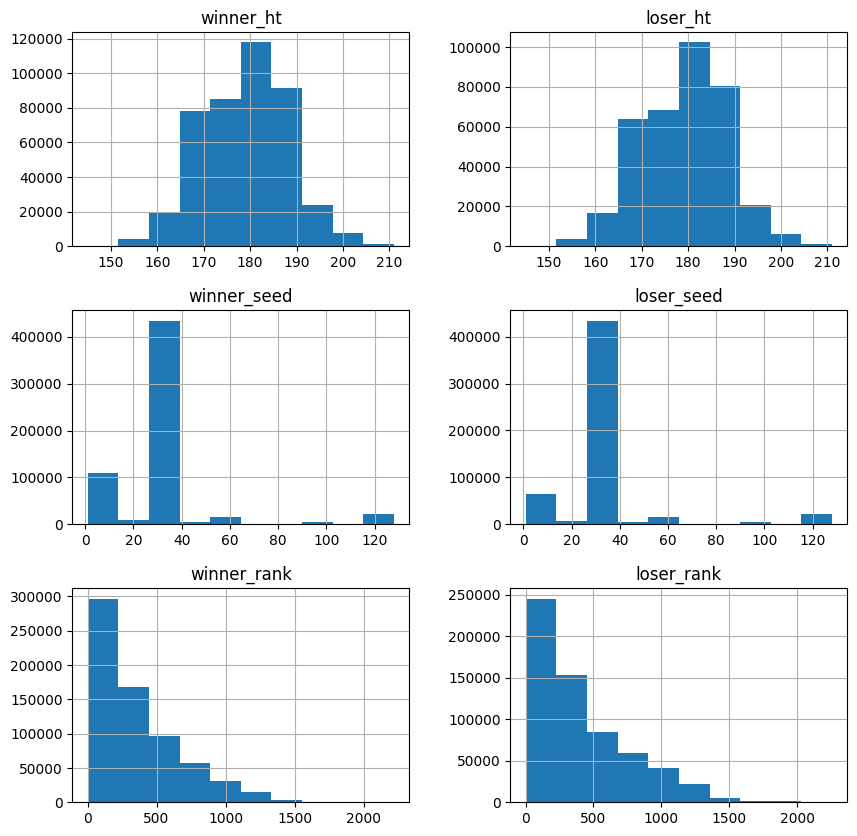

In [22]:
# Vista de distribucion de los datos
df[['winner_ht', 'loser_ht', 'winner_seed', 'loser_seed', 'winner_rank', 'loser_rank']].hist()
fig = plt.gcf()
fig.set_size_inches((10,10))
plt.show()

La distribucion de best_of es consta solo principalmente de partidos del mejor de 3 o 5 sets, y partidos no oficionales con otras rondas. Esto nos puede ayudar en el modelo de clasificación para definir que se puede predecir.

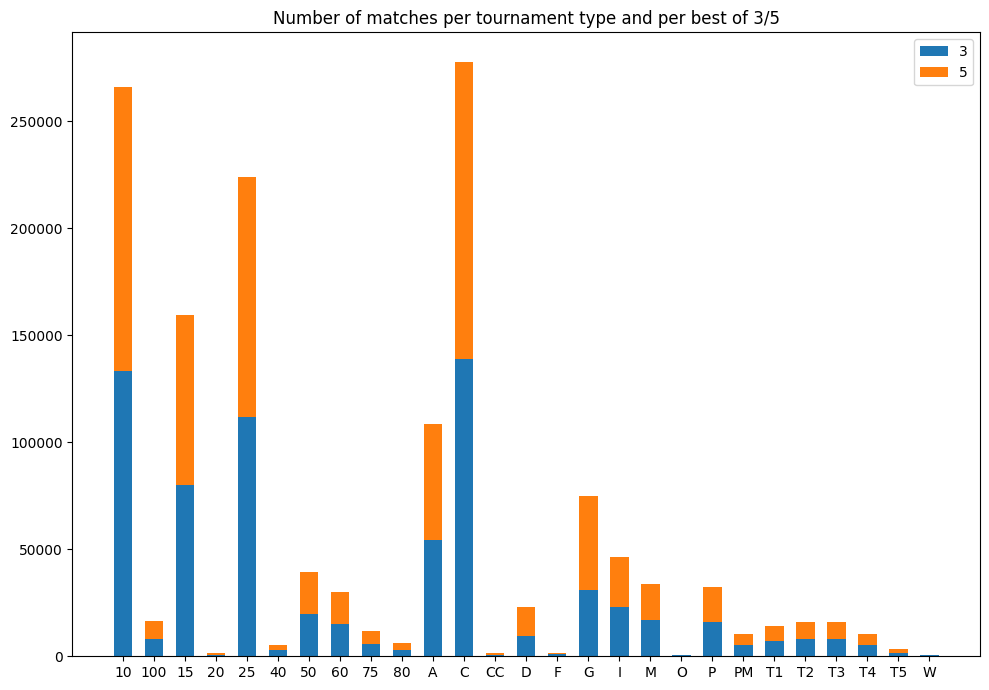

In [23]:
best_of_div = df.groupby(['tourney_level', 'best_of']).size()
species = best_of_div.index.get_level_values('tourney_level').unique().to_list()
layers = best_of_div.index.get_level_values('best_of').unique().to_list()
plotting = pd.DataFrame(columns=species, index=layers)
plotting.loc[:,:] = 0

for idx, val in zip(best_of_div.index, best_of_div.values) :
    plotting.loc[idx[1], str(idx[0])] = val


width = 0.6
fig, ax = plt.subplots(figsize=(10,7))
bottom = np.zeros(len(species))

for boolean, weight in zip(plotting.index, plotting.cumsum().values): 
    p = ax.bar(species, weight, width, label=boolean, bottom=bottom)
    bottom = np.asarray(weight)

ax.set_title('Number of matches per tournament type and per best of 3/5')
ax.legend()
plt.tight_layout()
plt.show()

Como se puede observar, las distribuciones entre 3 y 5 son en general equitativas. Sin embargo entre los diferentes torneos hay una gran diferencia de datos.

In [24]:
df = df[df['tourney_level'].isin(['G', 'D', 'P', 'PM', 'M', '50', '60', '75', '100'])]

Nos quedamos solo con los más importantes - suponemos mejor documentacion y mayor uniformidad y calidad en los datos. 

'G' = Grand Slams, 'M' = Masters 1000s, 'A' = other tour-level events, 'C' = Challengers
International Tournements Finals levels are given by prize money, such as '15' = ITF $15,000

### Target Classification

Entre las opciones interesantes a realizar como modelo regresor : 
- Apuestas In game / Pre game : se elige pre game <-> la información es más fácil de conseguir para futuros pártidos, y no hace falta que sea en tiempo real, si se quisiese utilizar en casos no conocidos por el dataset. 
- Posible apuesta: 
    - Jugador Ganador :  Clasificador binario - gana jugador 1, o jugador 2. 
    - Resultadopor sets: Que jugador gana cada set - ie. 122, el mejor de tres lo gana el jugador 2, consiguiendo ganar los dos ultimos sets. 
    - Resultado Detallada: Posiblemente sea más fácil con datos in-game, se intenta predecir los puntos por set, ie 6-4. 

Opción elegida:  resultado por sets, la opcion más completa sin que sea demasiado aleatorio, sin la falta de datos de ingame. 
Con esta opción un tanto ambigua: podemos apostar en por ejemplo: ganador del pártido, ganador del set, hándicap, y/o total de juegos. 
Vease un <a href = https://sports.bwin.es/es/sports/tenis-5>(ejemplo real)</a>. ** No se está incitando a las apuestas, y se recomienda el juego responsable. 

La distribucion entre partidos de 3 y 5 parece ser equitativa , por lo que se ha decidio realizar un clasificador para ambos simulatenamente, el clasificador no deberia tener problema, pues un atributo le indica si debe seleccionar las clases de mejor de 3 o mejor de 5.

Además nos da igual que gane gane 7(6)-5, que 6-0. 


In [25]:
# mejor de 3
bo3 = ['00', '11', '101', '010', '100', '011' ]

# mejor de 5
import itertools as it
bo5 = []
for result in it.product('01', repeat=5): 
    sets = ''.join(result[:3])
    count_1 = np.asarray([int(p) for p in result[:3]]).sum()
    count_0 =  3 - count_1
    pos = 3
    while count_0 < 3 and count_1 < 3:
        if int(result[pos])==0: count_0 += 1
        else: count_1 += 1
        sets += result[pos]
        pos += 1
    if sets not in bo5: 
        bo5.append(sets)

classes=bo3+bo5
print(classes)

['00', '11', '101', '010', '100', '011', '000', '0010', '00110', '00111', '0100', '01010', '01011', '01100', '01101', '0111', '1000', '10010', '10011', '10100', '10101', '1011', '11000', '11001', '1101', '111']


In [26]:
regex = r"\d+(?:\(\d+\))?-\d+(?:\(\d+\))?"
## construir clases segun score 
def check_re(test_str):
    class_target = ''
    for ronda in re.finditer(regex, test_str):
        sets =[ points.group()
               for score in ronda.group().split('-')
               for points in re.finditer(r"\d+(?:\(\d+\))?", score)]
        numbers = []
        for points in sets: 
            n = re.search(r"^\d+", points)
            numbers.append(int(n.group())) if n else numbers.append(-1)
        class_target += str(np.argmax(numbers))
    
    return class_target           

In [27]:
df['y'] = df.score.apply(lambda x : check_re(x) if not pd.isna(x) and check_re(x) in classes else '-'+check_re(x) if not pd.isna(x) else '-')
df['y'].unique()

array(['000', '11000', '10100', '1000', '00110', '00', '0100', '0010',
       '01100', '10010', '01010', '010', '100', '-0', '-', '1011', '-10',
       '-110', '11001', '10011', '-01', '101', '-001', '011', '-0110',
       '-1', '11', '-1100', '-1010', '-0101', '-1001', '111', '01101',
       '10101', '-0011', '-10000', '-00100', '-0000'], dtype=object)

Como se puede observar hay combinaciones que no hemos tenido en cuenta, veamos ejemplos:

In [28]:
df.query("y.str.startswith('-')")[['tourney_name', 'tourney_level', 'score', 'best_of', 'y']]

,tourney_name,tourney_level,score,best_of,y
384,AUSTRALIAN OPEN,G,6-3 RET,3,-0
1626,MIAMI MASTERS,M,W/O,3,-
1796,DAVIS CUP G1 SF: CHI VS ARG,D,W/O,5,-
1802,DAVIS CUP G1 SF: CHI VS ARG,D,W/O,5,-
2126,DAVIS CUP G2 R1: TUR VS DEN,D,6-7(5) 6-3 RET,5,-10
...,...,...,...,...,...
740217,W60 GOLD COAST,60,6-4 2-3 RET,3,-01
740312,W60 GOLD COAST,60,6-2 RET,3,-0
740733,W60 TRNAVA,60,W/O,3,-
741195,W100 DUBAI,100,2-1 RET,3,-0


In [29]:
df.loc[df['y'].str.startswith('-'),'score'].apply(lambda x : re.sub(r'[^a-zA-Z]+', '', x) if not pd.isna(x) else '').unique()

array(['RET', 'WO', '', 'PLAYEDANDABANDONED', 'DEF', 'ABD', 'WALKOVER',
       'RE', 'PLAYEDANDUNFINISHED', 'NBSP', 'RETH'], dtype=object)

W/O -> walkover : no presentado

RE / RET/ RETH / ABD / PLAYED AND ABANDONED-UNFINISHED-> Retired no se juegan todo el set, pierde automaticamente quien no ha jugado. 

otros : DEF/NBSP/BYE/ MAY

En cualquiera los casos descritos el score no llega al minimo de sets por partido. Por ello, no existe combinacion - None, o no esta entre los planteados. 

Para simplificar el clasificador y teniendo en cuenta que si se cancela no se apostará, se eliminan los 4796 partidos no completos (independientemente del motivo)

In [30]:
df = df.drop(df[df['y'].str.startswith('-')].index, axis=0)

## Dataset cleaning & samples generation

In [31]:
# calculo de quien es el ganador en base a score transformed 
df['winner']=df.y.apply(lambda x : 'p'+str(np.argmax([sum([int(i)==n for i in x]) for n in [0,1]] )))
df['winner'].unique()

array(['p0', 'p1'], dtype=object)

In [32]:
match_data = ['tourney_name', 'draw_size', 'tourney_level', 'tourney_date', 'best_of', 'round', 'y']
player_data = ['_id', '_seed', '_entry', '_name', '_hand', '_ht', '_ioc', '_age', '_rank', '_rank_points']

p_df = pd.DataFrame(index = df.index, 
                    columns= ['p0' + p for p in player_data] + ['p1' + p for p in player_data] + match_data)

p_df[match_data] = df[match_data]

In [33]:
p0_winner = df[df['winner']=='p0'].filter(like='winner_')
p1_loser = df[df['winner']=='p0'].filter(like='loser_')

p_df.loc[p0_winner.index, ['p0' + p for p in player_data]] = p0_winner.values
p_df.loc[p0_winner.index, ['p1' + p for p in player_data]] = p1_loser.values

In [34]:
p1_winner = df[df['winner']=='p1'].filter(like='winner_')
p0_loser = df[df['winner']=='p1'].filter(like='loser_')

p_df.loc[p1_winner.index, ['p1' + p for p in player_data]] = p1_winner.values
p_df.loc[p1_winner.index, ['p0' + p for p in player_data]] = p0_loser.values

In [35]:
p_df.reset_index(inplace=True)

### Missing & Null Values Treatment

In [36]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142150 entries, 0 to 142149
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           142150 non-null  int64         
 1   p0_id           142084 non-null  object        
 2   p0_seed         115542 non-null  object        
 3   p0_entry        15657 non-null   object        
 4   p0_name         142150 non-null  object        
 5   p0_hand         142141 non-null  object        
 6   p0_ht           118971 non-null  object        
 7   p0_ioc          142148 non-null  object        
 8   p0_age          142022 non-null  object        
 9   p0_rank         138944 non-null  object        
 10  p0_rank_points  138944 non-null  object        
 11  p1_id           142150 non-null  object        
 12  p1_seed         106738 non-null  object        
 13  p1_entry        26908 non-null   object        
 14  p1_name         142150 non-null  obj

In [37]:
p_df.isna().sum(axis=0).sort_values(ascending=False)

p0_entry          126493
p1_entry          115242
p1_seed            35412
p1_ht              33966
p0_seed            26608
p0_ht              23179
p1_rank_points      7548
p1_rank             7548
p0_rank             3206
p0_rank_points      3206
p1_age               662
p0_age               128
p0_id                 66
p1_hand               44
p0_hand                9
p1_ioc                 6
p0_ioc                 2
index                  0
best_of                0
tourney_level          0
round                  0
tourney_date           0
p1_name                0
draw_size              0
tourney_name           0
p1_id                  0
p0_name                0
y                      0
dtype: int64

In [38]:
p_df = p_df.dropna(subset=['p0_id', 'p1_id'])

standarizar las entrada y ronda

- ALT / AL / A -> ALT
- SR / SE -> SR : Special ranking/entry
- NaN -> DIR : Entrada directa


In [39]:
p_df['p1_entry'] = p_df['p1_entry'].apply(lambda x : 'ALT' if x in ('ALT','AL','A') else \
                                        'SE' if x in ('SR', 'SE') else \
                                        'JR' if x in ('SR', 'SE') else \
                                        'DIR' if pd.isna(x) else \
                                        x)
p_df['p0_entry'] = p_df['p0_entry'].apply(lambda x : 'ALT' if x in ('ALT','AL','A') else \
                                        'SE' if x in ('SR', 'SE') else \
                                        'JR' if x in ('SR', 'SE') else \
                                        'DIR' if pd.isna(x) else \
                                        x)

Since the seed is based on the ranking, we will fill it with draw_size for now, (maybe later we will remove the attribute)

In [40]:
p_df['p0_seed'] = p_df['p0_seed'].fillna(p_df['draw_size']).infer_objects(copy=False).copy()
p_df['p1_seed'] = p_df['p1_seed'].fillna(p_df['draw_size']).infer_objects(copy=False).copy()

C:\Users\Ferrer\AppData\Local\Temp\ipykernel_10472\2015356593.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  p_df['p0_seed'] = p_df['p0_seed'].fillna(p_df['draw_size']).infer_objects(copy=False).copy()
C:\Users\Ferrer\AppData\Local\Temp\ipykernel_10472\2015356593.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  p_df['p1_seed'] = p_df['p1_seed'].fillna(p_df['draw_size']).infer_objects(copy=False).copy()


Si el rank esta missing suponemos que no ha competido previamente ya sea en el torneo, o en otros, y se le asignara un 0 

In [41]:
p_df.loc[:,p_df.filter(like='rank').columns.tolist()] = p_df.filter(like='rank').fillna(0).infer_objects(copy=False).copy()

C:\Users\Ferrer\AppData\Local\Temp\ipykernel_10472\1935895754.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  p_df.loc[:,p_df.filter(like='rank').columns.tolist()] = p_df.filter(like='rank').fillna(0).infer_objects(copy=False).copy()


Para cualquier altura y edad se basara en los datos de players.

In [42]:
p0_mask = pd.isna(p_df.p0_ht)
p_df.loc[p0_mask, 'p0_ht'] = players.loc[p_df.loc[p0_mask, 'p0_id'], 'height'].values

p1_mask = pd.isna(p_df.p1_ht)
p_df.loc[p1_mask, 'p1_ht'] = players.loc[p_df.loc[p1_mask, 'p1_id'], 'height'].values

In [43]:
p0_mask = pd.isna(p_df.p0_age)
p_df.loc[p0_mask, 'p0_age'] = p_df.loc[p0_mask, 'tourney_date'].dt.year.values - players.loc[p_df.loc[p0_mask, 'p0_id'], 'dob'].dt.year.values
p1_mask = pd.isna(p_df.p1_age)
p_df.loc[p1_mask, 'p1_age'] = p_df.loc[p1_mask, 'tourney_date'].dt.year.values - players.loc[p_df.loc[p1_mask, 'p1_id'], 'dob'].dt.year.values

In [44]:
p0_mask = pd.isna(p_df.p0_hand)
p_df.loc[p0_mask, 'p0_hand'] = players.loc[p_df.loc[p0_mask, 'p0_id'], 'hand'].values

p1_mask = pd.isna(p_df.p1_hand)
p_df.loc[p1_mask, 'p1_hand'] = players.loc[p_df.loc[p1_mask, 'p1_id'], 'hand'].values

In [49]:
p0_mask = pd.isna(p_df.p0_ioc)
p_df.loc[p0_mask, 'p0_ioc'] = players.loc[p_df.loc[p0_mask, 'p0_id'], 'ioc'].values

p1_mask = pd.isna(p_df.p1_ioc)
p_df.loc[p1_mask, 'p1_ioc'] = players.loc[p_df.loc[p1_mask, 'p1_id'], 'ioc'].values

In [54]:
mask = pd.isna(p_df.p0_ioc) | pd.isna(p_df.p1_ioc)
p_df.loc[mask, ['p0_name', 'p0_id', 'p0_ioc','p1_name', 'p1_id', 'p1_ioc'] ]

,p0_name,p0_id,p0_ioc,p1_name,p1_id,p1_ioc
39067,BENJAMIN LOCK,4393.0,ZWE,HAZEM NAW,7092,NaN
39069,HAZEM NAW,7092.0,NaN,MEHLULI DON AYANDA SIBANDA,5947,ZWE
119507,JIA QI KANG,19280.0,CHN,QIAN YANG,22595,None
134736,ANNA SINCLAIR ROGERS,23046.0,USA,YU CHEN,22594,None
136331,MAILEEN NUUDI,20775.0,EST,VESA GJINAJ,25527,None
141036,LE YI LIU,22585.0,None,DUANRUI GAO,27464,CHN
141049,ANASTASIIA GUREVA,25988.0,RUS,LE YI LIU,22585,None


In [57]:
players.loc[players['new_id']==7092, 'ioc'] = 'SYR'
players.loc[players['new_id']==22595, 'ioc'] = 'CHN'
players.loc[players['new_id']==22594, 'ioc'] = 'CHN'
players.loc[players['new_id']==25527, 'ioc'] = 'XKX'
players.loc[players['new_id']==22585, 'ioc'] = 'CHN'


In [58]:
p0_mask = pd.isna(p_df.p0_ioc)
p_df.loc[p0_mask, 'p0_ioc'] = players.loc[p_df.loc[p0_mask, 'p0_id'], 'ioc'].values

p1_mask = pd.isna(p_df.p1_ioc)
p_df.loc[p1_mask, 'p1_ioc'] = players.loc[p_df.loc[p1_mask, 'p1_id'], 'ioc'].values

In [59]:
p_df.isna().sum().sum()

0

In [60]:
p_df.shape

(142084, 28)

### Duplicate Data

Una vez hecho este formato, se puede duplicar el dataset, dando la vuelta a los player 1 & 0, e invirtiendo las caracteristicas. 

In [61]:
map_cols = dict()

for attr in player_data:
    map_cols['p0'+attr] = 'p1'+attr
    map_cols['p1'+attr] = 'p0'+attr

inverse_df = p_df.rename(map_cols)
inverse_df['y'] = inverse_df['y'].str.replace("0", "X").str.replace("1", "0").str.replace("X", "1")

In [62]:
final_df = pd.concat([p_df, inverse_df])
final_df.to_parquet('processed_data.parquet')

final_df.sample(frac=1, random_state=111)
final_df.shape

(284168, 28)

In [63]:
players.to_parquet('players_data.parquet')

## ELO - Rating

El indice (rank) actual de ATP y WTA determina la semilla de entrada en el campeonato, los puntos del ranking se deciden por el stage del tournement al que han llegado y la reputacion del propio tournemente en el que han participado en las ultimas 52 semanas. 

ELO rankings son famoss sistemas de evaluar a un profesionales deportistas. ELO rating se basa en el rendimiento del jugador en sus ultimos partidos, bajo la asunción de normal distribution. 

Otro ranking - Glicko model. Una mejora de ELO. Se añaden parametros con la desviacion estandar, el factor de tiempo, y los rankings del oponente, añadiendo el factor de la incertidumbre, la varianza, y la dificultad del oponente. Un rating del oponente se supone que es aleatorio $\theta$ que sigue una distribución normal con la fuerza media del jugador, $r$, y un grado de incertidumbre de fuerza del otro jugador, $oppr$, es decir $\theta | r ~ N(r, oppr)$. Así se representa las expectativas del jugador. Si se añade el modelo bayesiano, se va regulando dicho ranking con mas juegos. 

En general se sigue el ppio de Pareto 80-20, el 80% de los partidos son ganados por el 20% de los jugadores. 

### James-Stein Estimator 